# Linear Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
def predict(X, wt):
  return np.dot(X, wt[1:])+wt[0]

def mse(y, y_predicted):
  return np.mean((y_predicted-y)**2)

In [ ]:
def linearRegression(X, y, alpha = 0.001, max_iter = 100000):
  m, n = X.shape
  n = n + 1
  x = np.append(np.ones((m, 1)), X, axis=1)
  
  wt_history = []
  wt = np.random.rand(n, 1)

  for i in range(max_iter):
    wt_history.append(wt.copy()) 
    y_predicted = predict(X, wt)

    dw = (1/m) * np.dot(x.T, (y_predicted - y))
    wt -= alpha * dw

  wt_history.append(wt.copy())
  return wt_history

def show_line(X_train, X_test, y_train, y_test, y_predicted):
    cmap = plt.get_cmap('viridis')
    fig = plt.figure(figsize = (8, 6))
    m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s = 10, label = 'Training Data')
    m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s = 10, label = 'Testing Data')
    plt.plot(X_test, y_predicted, color = 'black', linewidth = 2, label = 'Regression Line')
    plt.legend()
    plt.show()

## Example Implementation

In [ ]:
m = 100
n = 1

X, y = datasets.make_regression(n_samples = m, n_features = n, noise = 20, random_state = 7)
y = y.reshape(m, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

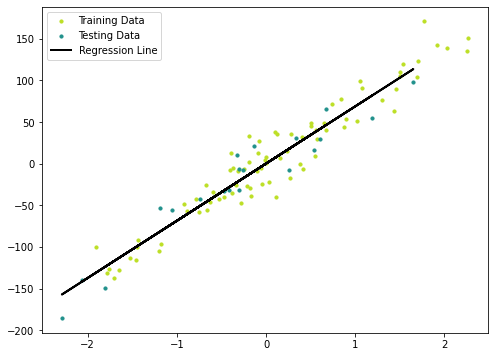

In [ ]:
wt_history = linearRegression(X_train, y_train, max_iter = 5000)
wt_final = wt_history[-1]

show_line(X_train, X_test, y_train, y_test, predict(X_test, wt_final))

In [ ]:
err_train = []
err_test = []
for wt in wt_history:
  y_train_predicted = predict(X_train, wt)
  y_test_predicted = predict(X_test, wt)

  err_train.append(mse(y_train, y_train_predicted))
  err_test.append(mse(y_test, y_test_predicted))

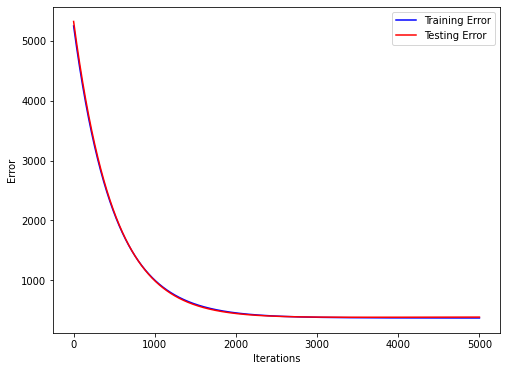

In [ ]:
fig = plt.figure(figsize = (8, 6))
# plt.set(xlabel = 'Iterations', ylabel = 'Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.plot(err_train, color='b')
plt.plot(err_test, color='r')
plt.legend(['Training Error', 'Testing Error'])
plt.show()

# Car Price Prediction

In [ ]:
import pandas as pd
import seaborn as sns
!gdown 1m_uJkaKZvX24wdyAjXFIxTUY3SIawaCF

Downloading...
From: https://drive.google.com/uc?id=1m_uJkaKZvX24wdyAjXFIxTUY3SIawaCF
To: /content/CarPrice.csv
100% 26.7k/26.7k [00:00<00:00, 30.5MB/s]


## Data Reading

In [ ]:
df = pd.read_csv('/content/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(df.shape)
print(df.columns)

(205, 26)
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Cleaning

In [ ]:
df.drop('car_ID', axis = 1, inplace = True)

In [ ]:
names = df['CarName']
brands = []

for name in names:
    brand = name.split(" ")[0]
    brands.append(brand)

df.drop(['CarName'], axis = 1, inplace = True)
df.insert(1, "brand", brands)

df.head()

,symboling,brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(df.brand.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [ ]:
df.brand = df.brand.str.lower()

df.brand.replace('maxda', 'mazda', inplace = True)
df.brand.replace('porcshce', 'porsche', inplace = True)
df.brand.replace('toyouta', 'toyota', inplace = True)
df.brand.replace('vokswagen', 'volkswagen', inplace = True)
df.brand.replace('vw', 'volkswagen', inplace = True)

print(df.brand.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [ ]:
def addDummy(df, col):
  dummy = pd.get_dummies(df[col])

  df.drop(col, axis = 1, inplace = True)
  df = pd.concat([df, dummy], axis = 1)

  return df

In [ ]:
df = addDummy(df, 'brand')
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [ ]:
df['fueltype'] = (df['fueltype'] == 'diesel').astype(int)
df.fueltype.value_counts()

0    185
1     20
Name: fueltype, dtype: int64

In [ ]:
print(df.aspiration.unique())

['std' 'turbo']


In [ ]:
df['aspiration'] = (df['aspiration'] == 'turbo').astype(int)

In [ ]:
print(df.doornumber.unique())

['two' 'four']


In [ ]:
df.doornumber.replace('two', 2, inplace = True)
df.doornumber.replace('four', 4, inplace = True)

In [ ]:
print(df.carbody.unique())
print(df.drivewheel.unique())
print(df.enginelocation.unique())
print(df.enginetype.unique())
print(df.cylindernumber.unique())
print(df.fuelsystem.unique())

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [ ]:
df = addDummy(df, 'carbody')

df['drivewheel'] = 'drivewheel-' + df['drivewheel']
df = addDummy(df, 'drivewheel')

df['enginelocation'] = (df['enginelocation'] == 'front').astype(int)

df['enginetype'] = 'enginetype-' + df['enginetype']
df = addDummy(df, 'enginetype')

df.cylindernumber.replace('four', 4, inplace = True)
df.cylindernumber.replace('six', 6, inplace = True)
df.cylindernumber.replace('five', 5, inplace = True)
df.cylindernumber.replace('three', 3, inplace = True)
df.cylindernumber.replace('twelve', 12, inplace = True)
df.cylindernumber.replace('two', 2, inplace = True)
df.cylindernumber.replace('eight', 8, inplace = True)

df['fuelsystem'] = 'fuelsystem-' + df['fuelsystem']
df = addDummy(df, 'fuelsystem')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   enginelocation    205 non-null    int64  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  cylindernumber    205 non-null    int64  
 11  enginesize        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

## Prediction

In [ ]:
X = pd.concat([df.iloc[:, :19], df.iloc[:, 20:]], axis = 1)
y = df.iloc[:, 19]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   enginelocation    205 non-null    int64  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  cylindernumber    205 non-null    int64  
 11  enginesize        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

In [ ]:
def min_max_norm(X):
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    range_vals = max_vals - min_vals
    
    range_vals[range_vals == 0] = 1
    
    X_norm = (X - min_vals) / range_vals
    return X_norm


In [ ]:
X = min_max_norm(X.values)
y = y.values

m, n = X.shape
y = y.reshape(m, 1)

print(X.shape)
print(y.shape)

(205, 64)
(205, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
wt_history = linearRegression(X_train, y_train)
wt = wt_history[-1]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(wt.shape)

y_train_predicted = predict(X_train, wt)
y_test_predicted = predict(X_test, wt)

(164, 64)
(164, 1)
(41, 64)
(41, 1)
(65, 1)


## Error Checking

In [ ]:
print(np.mean(y_test))
print(np.mean(y_test_predicted))

print(mse(y_train, y_train_predicted))
print(mse(y_test, y_test_predicted))

12890.760170731708
12379.158735100811
2856515.3335567666
6704284.683292287


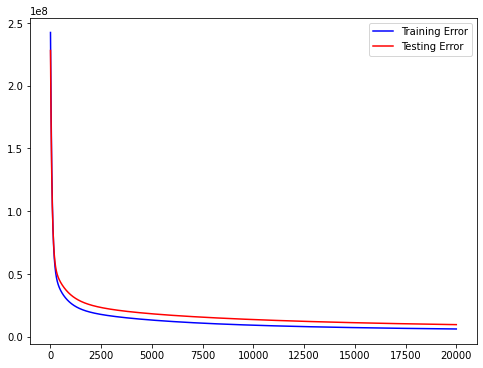

In [ ]:
err_train = []
err_test = []
for i in range(20000):
  y_train_predicted = predict(X_train, wt_history[i])
  y_test_predicted = predict(X_test, wt_history[i])

  err_train.append(mse(y_train, y_train_predicted))
  err_test.append(mse(y_test, y_test_predicted))

fig = plt.figure(figsize = (8, 6))
plt.plot(err_train, color='b')
plt.plot(err_test, color='r')
plt.legend(['Training Error', 'Testing Error'])
plt.show()